In [1]:
import random
import matplotlib.pyplot as plt

Text(0.5,1,'100000 Wagers')

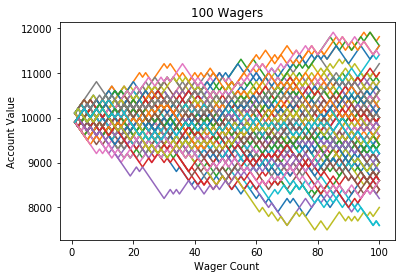

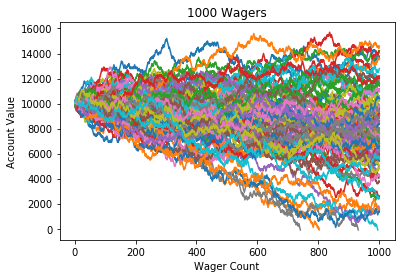

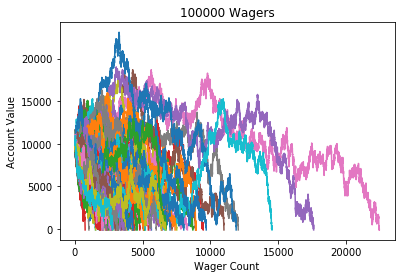

In [2]:
def rollDice():
    roll = random.randint(1,100)
    
    if roll == 100:
#         print("Roll was 100, you lose. Play Again!")
        return False
    elif roll<=50:
#         print("Roll was: " + str(roll) + ". You Lose!")
        return False
    else:
#         print("Roll was: " + str(roll) + ". You Win!")
        return True
    

def simple_bettor(funds, initial_wager, wager_count):
    value = funds
    wager = initial_wager
    
    wagerX = []
    valueY = []
    
    for i in range(1,wager_count+1):
        if rollDice():
            value += wager
        else:
            value -= wager
        wagerX.append(i)
        valueY.append(value)
            
        if value<0:
            value = 'broke'
            break
    
#     print("Funds: ", value)
    plt.plot(wagerX,valueY)
    

for i in range(100):
    simple_bettor(10000,100,100)

plt.xlabel("Wager Count")
plt.ylabel("Account Value")
plt.title('100 Wagers')


plt.figure()
for i in range(100):
    simple_bettor(10000,100,1000)

plt.xlabel("Wager Count")
plt.ylabel("Account Value")
plt.title('1000 Wagers')

plt.figure()
for i in range(100):
    simple_bettor(10000,100,100000)

plt.xlabel("Wager Count")
plt.ylabel("Account Value")
plt.title('100000 Wagers')

In [3]:
# Martingale Strategy

def doubler_bettor(funds, initial_wager, wager_count):
    value = funds
    wager, previous_wager_amount = initial_wager, initial_wager
    
    wagerX = []
    valueY = []
    
    previous_wager = 'win'
    
    global broke_count
    
    for i in range(1,wager_count+1):
        if previous_wager == 'win':
#             print("Last Wager: Won")
            if rollDice():
                value += wager
                previous_wager = 'win'
            else:
                value -= wager
                previous_wager = 'loss'
                previous_wager_amount = wager
        elif previous_wager == 'loss':
#             print("Last Wager: Lost. Double Wager!")
            wager = previous_wager_amount*2
            if rollDice():
#                 print("We won ", wager)
                value += wager
                wager = initial_wager
                previous_wager = 'win'
            else:
#                 print("We Lost ", wager)
                value -= wager
                previous_wager = 'loss'
                previous_wager_amount = wager
                
#         print(value)   
        wagerX.append(i) 
        valueY.append(value)
        if(value<0):
#                 print("Broke after ", i, " Wagers")
                broke_count += 1
                break
#     print("Total Value: ", value)           
    plt.plot(wagerX,valueY)

Broke Rate:  31.0
Survival Rate:  69.0


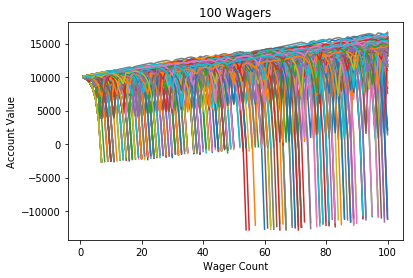

In [12]:
broke_count = 0
number_of_bettors = 1000
for i in range(number_of_bettors):
    doubler_bettor(10000,100,100)
    

plt.xlabel("Wager Count")
plt.ylabel("Account Value")
plt.title('100 Wagers')

print("Broke Rate: ", broke_count/float(number_of_bettors) * 100)
print("Survival Rate: ", 100 - broke_count/float(number_of_bettors) * 100)

NameError: name 'np' is not defined